# Fuerzas de ligadura | Rodadura

[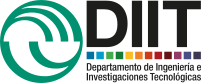](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2021 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Enunciado
**Cilindro que rueda por un plano inclinado**
[Marion (e) ex. 7.5]

La figura muestra un cilíndro rodando cuesta abajo en un plano inclinado.

![](figuras/marion_fig6_7.png "Rodadura de un cilíndro bajando en un plano inclinado")

1. Encuentre las ecuaciones de movimiento, 
2. la aceleración angular,
3. y la fuerzas de ligadura.

## Resolución
Si bien la ventaja de la formulación Lagrangiana es el evitar tener que pensar en las fuerzas de ligadura para centrarse en obtener la dinámica, usualmente desde el punto de vista ingenieríl estas fuerzas son un interrogante de la etapa de diseño.

In [1]:
import sympy as sym # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as mech # de sympy utilizaremos funciones de mecánica
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración

In [2]:
# parámetros físicos del sistema
m1, alfa, R, g = sym.symbols('m, alpha, R, g', positive=True)

In [3]:
e = mech.ReferenceFrame('e') # sistema de referencia en coordenadas cartesianas
g_vector = g* e.y # vector gravedad en este sistema de referencia

y, zeta = mech.dynamicsymbols('y, theta')

### Ligaduras
La condición de rodadura puede escribirse

$$
f(y,\theta) = y - R \theta = 0,
$$
donde $\hat{y}$ apunta en la dirección de descenso.

In [5]:
f1 = sym.Eq(sym.Function('f_1')(y, zeta), y- R* zeta) # ligadura l como función homogénea
f1

### Lagrangiano
Como rueda sobre su eje no hay que olvidar su momento de inercia $I= M R^2$ a la hora de escribir la energía cinética

$$
T = \frac{M}{2} \dot{y}^2 + \frac{I}{2} \dot{\theta}^2 = \frac{M}{2} \left( \dot{y}^2+ \frac{1}{2} R^2 \dot{\theta}^2 \right).
$$

La energía potencial solo depende del campo gravitatorio

$$
V = M g (l - y ) \sin(\alpha),
$$
donde se toma el cero de potencial en la base y $l$ es la longitud de la superficie inclinada.
Se obtiene entonces

$$
\mathcal{L}(y, \dot{y}, \dot{\theta}) = \frac{M}{2} \left( \dot{y}^2+ \frac{1}{2} R^2 \dot{\theta}^2 \right) - M g (l - y ) \sin(\alpha).
$$

### Euler-Lagrange con multiplicadores
Como interesa obtener las fuerza de ligadura no se utiliza la relación de restricción $f(y,\theta)$ para reducir los grados de libertad a uno solo, sino que se plantea

$$
\left\{
  \begin{array}{l} 
    \frac{\partial}{\partial y} \mathcal{L}
    - \frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial}{\partial \dot{y}} \mathcal{L}
    - \lambda \frac{\partial}{\partial y} f = 0\\
    \frac{\partial}{\partial \theta} \mathcal{L}
    - \frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial}{\partial \dot{\theta}} \mathcal{L}
    - \lambda \frac{\partial}{\partial \theta} f = 0
  \end{array}
\right. ,
$$
que resultan en

$$
\left\{
  \begin{array}{l} 
    M g \sin(\alpha)
    - M \ddot{y}
    - \lambda = 0\\
    - \frac{1}{2} M R^2 \ddot{\theta}
    + \lambda R = 0
  \end{array}
\right. .
$$

### Fuerzas generalizadas
Del sistema de ecuaciones de Euler-Lagrange habría que obtener el valor de $\lambda$.
Pero habiendo tres incógnitas: $\lambda, \ddot{y}$ y $\ddot{\theta}$ con dos ecuaciones esto no es posible.
Una 3.er ecuación involucrando estas variables se obtiene diferenciando la función de restricción de ligadura dos veces

$$
\begin{aligned}
f(y,\theta) &= y - R \theta = 0,\\
\frac{\mathrm{d^2}}{\mathrm{d} t^2} f(y,\theta) &=  \ddot{y} - R \ddot{\theta} =0 \implies \ddot{y} = R \ddot{\theta} .
\end{aligned}
$$
Con esto se elimina una incógnita en el sistema

$$
\left\{
  \begin{array}{l} 
    M g \sin(\alpha)
    - M \ddot{y}
    - \lambda = 0\\
    - \frac{1}{2} M R \ddot{y}
    + \lambda R = 0
  \end{array}
\right. ,
$$
del cuál puede obtenerse

$$
\lambda = - \frac{1}{3} M g \sin(\alpha),
$$
y con este multiplicador de Lagrange se obtienen las fuerzas generalizadas de ligadura


$$
\left\{
  \begin{array}{l} 
    Q_y = \lambda \frac{\partial}{\partial y} f = \lambda = - \frac{1}{3} M g \sin(\alpha)\\
    Q_\theta = \lambda \frac{\partial}{\partial \theta} f = - \lambda R = \frac{1}{3} M g R \sin(\alpha)
  \end{array}
\right. ,
$$

la primera es la fuerza aplicada en el centro de masa del cilindro en la dirección $\hat{y}$, y la segunda es el correspondiente torque.

## Ecuaciones de la dinámica
Basta con reemplazar el multiplicador $\lambda$ en el sistema de ecuaciones de Euler-Lagrange para describir la dinámica en función de cualquiera de las coordenadas alternativas

$$
\left\{
  \begin{array}{l} 
    \ddot{y} = - g \sin(\alpha) (\frac{1}{3} - 1)= \frac{2}{3} g \sin(\alpha) \\
    \ddot{\theta} = \frac{2}{3} \frac{g}{R} \sin(\alpha)
  \end{array}
\right. .
$$